CNN with WB

In [41]:
import pandas as pd


file_path = 'balanced_emotions.csv'  
df = pd.read_csv(file_path)


print("Columns in the CSV file:", df.columns)
print("Number of rows:", len(df))
print("\nFirst 5 rows of the file:")
print(df.head(50))


print("\nSummary of the CSV file:")
print(df.info())


print("\nUnique values in 'bvp' column:")
print(df['bvp'].unique())

print("\nUnique values in 'gsr' column:")
print(df['gsr'].unique())

print("\nUnique values in 'tmp' column:")
print(df['tmp'].unique())


Columns in the CSV file: Index(['bvp', 'gsr', 'tmp', 'Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5',
       'FT9', 'T7', 'CP5', 'CP1', 'P3', 'O1', 'Pz', 'Oz', 'O2', 'P8', 'P4',
       'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2',
       'emotions'],
      dtype='object')
Number of rows: 2500000

First 5 rows of the file:
           bvp gsr tmp          Cz          Fz          Fp1          F7  \
0            -   -   -    0.302363   -7.096073  -101.211319   31.076109   
1            -   -   -   17.957930   -8.952662  -142.392776  -99.683762   
2            -   -   -   -1.246601    0.026789   -29.116726    4.988264   
3    -9.084221   -   -   -2.743911    1.346458  -175.929443   31.028088   
4     31.04414   -   -   -4.831451   -9.078684  -448.659424  255.613052   
5            -   -   -    1.267903    0.846517   -12.072380   -0.384471   
6    -47.06926   -   -    6.375865   -1.506453  -301.168823  -26.477386   
7            -   -   -   -0.091830   -0.404297   -23.

Epoch 1/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.2254 - loss: 2.1991 - val_accuracy: 0.3196 - val_loss: 1.5238
Epoch 2/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2536 - loss: 1.6420 - val_accuracy: 0.3199 - val_loss: 1.5214
Epoch 3/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.2740 - loss: 1.5629 - val_accuracy: 0.3411 - val_loss: 1.4960
Epoch 4/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2930 - loss: 1.5327 - val_accuracy: 0.3462 - val_loss: 1.4773
Epoch 5/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3116 - loss: 1.5056 - val_accuracy: 0.3724 - val_loss: 1.4439
Epoch 6/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.3215 - loss: 1.4886 - val_accuracy: 0.3710 - val_loss: 1.4267
Epoch 7/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.3292 - loss: 1.4680 - val_accuracy: 0.3750 - val_loss: 1.4048
Epoch 8/25
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3397 - los

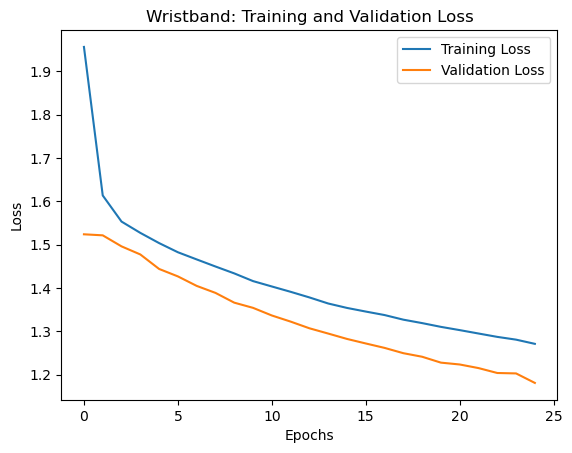

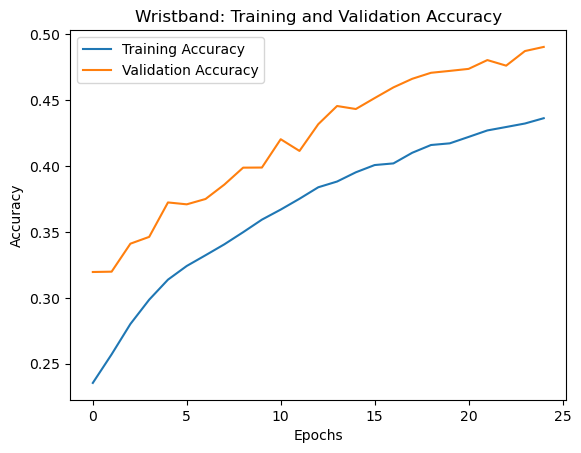

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from imblearn.over_sampling import SMOTE


balanced_data = pd.read_csv("balanced_emotions.csv")


wristband_features = ['bvp', 'gsr', 'tmp']
X_wristband = balanced_data[wristband_features].values
y_wristband = balanced_data['emotions'].values


X_wristband = pd.DataFrame(X_wristband)
X_wristband = X_wristband.apply(pd.to_numeric, errors='coerce')


valid_data = X_wristband.dropna()


valid_labels = y_wristband[valid_data.index]


X_valid_wristband = valid_data


scaler = StandardScaler()
X_valid_wristband = scaler.fit_transform(X_valid_wristband)


label_encoder = LabelEncoder()
y_valid_wristband = label_encoder.fit_transform(valid_labels)
num_classes = len(np.unique(y_valid_wristband))
y_valid_wristband = tf.keras.utils.to_categorical(y_valid_wristband, num_classes)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_valid_wristband, y_valid_wristband)


X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))


X_train_wristband, X_temp_wristband, y_train_wristband, y_temp_wristband = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val_wristband, X_test_wristband, y_val_wristband, y_test_wristband = train_test_split(X_temp_wristband, y_temp_wristband, test_size=0.5, random_state=42)


def create_wristband_model(input_shape, num_classes):
    model = Sequential([
      
        tf.keras.layers.Input(shape=input_shape),
        
    
        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=1),  
        Dropout(0.3),
        
   
        Conv1D(256, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=1),  
        Dropout(0.4),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        
        Dense(num_classes, activation='softmax')
    ])
    return model




input_shape_wristband = (X_resampled.shape[1], X_resampled.shape[2])
wristband_model = create_wristband_model(input_shape_wristband, num_classes)


wristband_model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_wristband_model.keras", monitor='val_loss', save_best_only=True, mode='min')


history_wristband = wristband_model.fit(
    X_train_wristband, y_train_wristband,
    batch_size=32,
    epochs=25,
    validation_data=(X_val_wristband, y_val_wristband),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)


best_wristband_model = tf.keras.models.load_model("best_wristband_model.keras")


test_loss_wristband, test_accuracy_wristband = best_wristband_model.evaluate(X_test_wristband, y_test_wristband, verbose=0)


print(f"Wristband Test Accuracy: {test_accuracy_wristband:.4f}")
print(f"Wristband Test Loss: {test_loss_wristband:.4f}")


plt.plot(history_wristband.history['loss'], label='Training Loss')
plt.plot(history_wristband.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Wristband: Training and Validation Loss')
plt.legend()
plt.show()


plt.plot(history_wristband.history['accuracy'], label='Training Accuracy')
plt.plot(history_wristband.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Wristband: Training and Validation Accuracy')
plt.legend()
plt.show()


GRad CAM on CNN WB

In [51]:

best_wb_model = tf.keras.models.load_model("best_wristband_model.keras")


best_wb_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_34 (Conv1D)                   │ (None, 3, 128)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 3, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_34 (MaxPooling1D)      │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_35 (Conv1D)                   │ (None, 3, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 3, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_35 (MaxPooling1D)      │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 894,737 (3.41 MB)

 Trainable params: 297,989 (1.14 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 595,980 (2.27 MB)

In [79]:
import os
import matplotlib.pyplot as plt
import numpy as np

def save_gradcam_plots(model, X_data, y_data, label_encoder, n_samples=45, save_dir=os.path.expanduser('~')):
    """Create and save Grad-CAM visualizations for all classes"""
    modalities = ['BVP', 'GSR', 'TEMP']
    colors = ['#FF5252', '#4CAF50', '#2196F3']
    
    
    os.makedirs(save_dir, exist_ok=True)
    
 
    for class_idx in range(len(label_encoder.classes_)):
        class_name = label_encoder.inverse_transform([class_idx])[0]
        
  
        class_samples = X_data[np.argmax(y_data, axis=1) == class_idx]
        if len(class_samples) < n_samples:
            print(f"Only {len(class_samples)} samples available for class {class_name}")
            n_samples = len(class_samples)
        
 
        combined_signals = np.array([sample for sample in class_samples[:n_samples]])
        
  
        saliency_maps = np.array([generate_saliency_map(model, sample).squeeze() 
                                for sample in class_samples[:n_samples]])
        

        fig, axs = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
        fig.suptitle(f"Grad-CAM: {class_name} Class", 
                    y=1.02, fontsize=14, fontweight='bold')
        
        time = np.arange(n_samples)
        
        for mod_idx, (modality, color) in enumerate(zip(modalities, colors)):
            ax = axs[mod_idx]
            signal = combined_signals[:, mod_idx]
            saliency = saliency_maps[:, mod_idx]
            
 
            ax.plot(time, signal, color='#808080', alpha=0.7, linewidth=1)
            
     
            threshold = np.percentile(saliency, 80)
            important = saliency > threshold
            ax.scatter(time[important], signal[important], 
                      color=color, 
                      s=40,
                      alpha=0.8,
                      label='Important regions')
            
       
            ax.fill_between(time, signal.min(), signal.max(), 
                           where=important,
                           color=color,
                           alpha=0.08)
            
            
            ax.set_ylabel(f'Standardized {modality}', fontsize=10)
            ax.grid(True, alpha=0.2)
            ax.legend(loc='upper right', framealpha=1)
            
            
            ax.set_xlabel('Sample Sequence Index', fontsize=10)
        
        plt.tight_layout()
        
        
        filename = os.path.join(save_dir, f"GradCAM_{class_name.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Saved plot for {class_name} to {filename}")
        plt.close()
        

save_gradcam_plots(best_wristband_model,
                  X_test_wristband,
                  y_test_wristband,
                  label_encoder,
                  n_samples=45)

Saved plot for Excited to C:\Users\Abdur Rafay\GradCAM_Excited.png
Saved plot for Fear to C:\Users\Abdur Rafay\GradCAM_Fear.png
Saved plot for Happy to C:\Users\Abdur Rafay\GradCAM_Happy.png
Saved plot for Sad to C:\Users\Abdur Rafay\GradCAM_Sad.png
Saved plot for relax to C:\Users\Abdur Rafay\GradCAM_relax.png


CNN with EEG

C:\Users\Abdur Rafay\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 711s 13ms/step - accuracy: 0.3532 - loss: 1.4907 - val_accuracy: 0.5278 - val_loss: 1.1200
Epoch 2/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 725s 13ms/step - accuracy: 0.4773 - loss: 1.2105 - val_accuracy: 0.5582 - val_loss: 1.0572
Epoch 3/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 747s 14ms/step - accuracy: 0.5029 - loss: 1.1572 - val_accuracy: 0.5783 - val_loss: 1.0173
Epoch 4/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 717s 13ms/step - accuracy: 0.5154 - loss: 1.1298 - val_accuracy: 0.5850 - val_loss: 1.0165
Epoch 5/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 806s 15ms/step - accuracy: 0.5241 - loss: 1.1138 - val_accuracy: 0.5909 - val_loss: 1.0061
Epoch 6/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 913s 17ms/step - accuracy: 0.5293 - loss: 1.1006 - val_accuracy: 0.5932 - val_loss: 1.0121
Epoch 7/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 845s 15ms/step - accuracy: 0.5328 - loss: 1.0926 - val_accuracy: 0.6012 - val_loss: 0.9935
Epoch 8/25
54688/54688 ━━━━━━━━━━━━━━━━━━━━ 912s 17ms/s

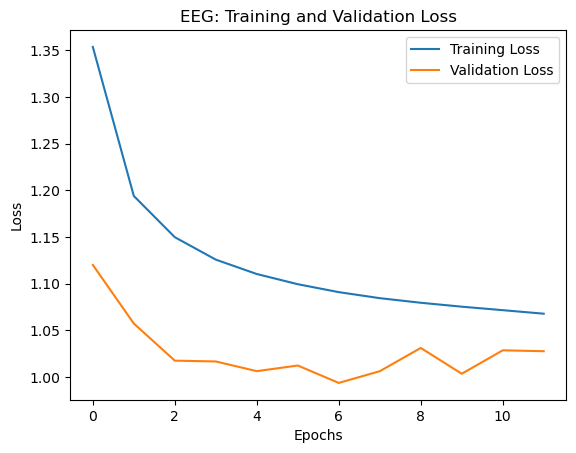

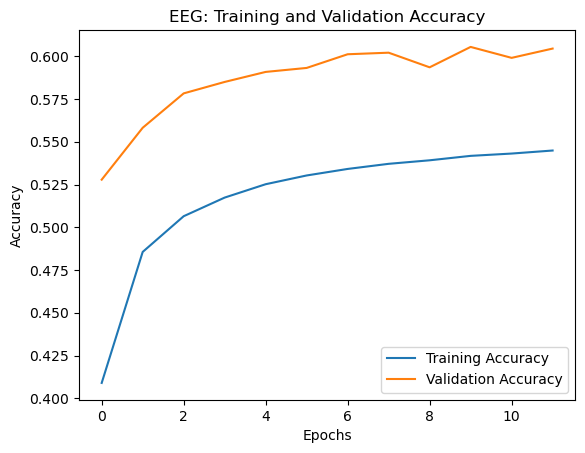

In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization  # Add this import
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


balanced_data = pd.read_csv("balanced_emotions.csv")


eeg_features = [col for col in balanced_data.columns if col not in ['bvp', 'gsr', 'tmp', 'timestamp', '128', 'emotions']]
X_eeg = balanced_data[eeg_features].values.astype(np.float32)
y_eeg = balanced_data['emotions'].values


scaler = StandardScaler()
X_eeg = scaler.fit_transform(X_eeg)


label_encoder = LabelEncoder()
y_eeg = label_encoder.fit_transform(y_eeg)
num_classes = len(np.unique(y_eeg))
y_eeg = tf.keras.utils.to_categorical(y_eeg, num_classes)


X_eeg = X_eeg.reshape((X_eeg.shape[0], X_eeg.shape[1], 1))


X_train_eeg, X_temp_eeg, y_train_eeg, y_temp_eeg = train_test_split(X_eeg, y_eeg, test_size=0.3, random_state=42)
X_val_eeg, X_test_eeg, y_val_eeg, y_test_eeg = train_test_split(X_temp_eeg, y_temp_eeg, test_size=0.5, random_state=42)


def create_eeg_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(128, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(256, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.4),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


input_shape_eeg = (X_eeg.shape[1], X_eeg.shape[2])
eeg_model = create_eeg_model(input_shape_eeg, num_classes)


eeg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_eeg_model.keras", monitor='val_loss', save_best_only=True, mode='min')


history_eeg = eeg_model.fit(
    X_train_eeg, y_train_eeg,
    batch_size=32,
    epochs=25,
    validation_data=(X_val_eeg, y_val_eeg),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)


best_eeg_model = tf.keras.models.load_model("best_eeg_model.keras")


test_loss_eeg, test_accuracy_eeg = best_eeg_model.evaluate(X_test_eeg, y_test_eeg, verbose=0)


print(f"EEG Test Accuracy: {test_accuracy_eeg:.4f}")
print(f"EEG Test Loss: {test_loss_eeg:.4f}")


plt.plot(history_eeg.history['loss'], label='Training Loss')
plt.plot(history_eeg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EEG: Training and Validation Loss')
plt.legend()
plt.show()


plt.plot(history_eeg.history['accuracy'], label='Training Accuracy')
plt.plot(history_eeg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('EEG: Training and Validation Accuracy')
plt.legend()
plt.show()